In [110]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from fancyimpute import KNN
from sklearn.metrics import mean_squared_error
from math import sqrt
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
import sys
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from openpyxl import load_workbook
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [223]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    #print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    #print(out.to_string())         
    
    if result[1] <= 0.05:
        return "Stationary"
    else:
        return "Non-Stationary"

In [558]:
dff = pd.read_excel(r"C:\Users\bhati\OneDrive\Desktop\Dataset_Fyp.xlsx", sheet_name='Version5.1',engine='openpyxl')
dff['Date'] = pd.to_datetime(dff['Date'], format='%d-%m-%Y')
dff.set_index('Date', inplace=True)
columns = list(dff.columns)
dff.head()

,Outward Remittances,Foreign Investment Inflows,Foreign Trade - Trade Balance - Oil,Sales and Purchases of Dollar -Sale,Sales and Purchases of Dollar -Net,International Trade Services - Imports,International Trade Services - Exports,External Commercial borrowings - Total Number,External Commercial borrowings - Total Amount,External Commercial borrowings - Weighted Average Maturity,Value of Rupee
Date,,,,,,,,,,,
2020-02-14,822.057953,2873,-3909.338048,-717.286214,9144,2183.962961,3448.222619,91,4175,8.66,71.45
2020-02-15,820.730165,2873,-3900.894823,-733.501969,9144,2177.611519,3435.571668,91,4175,8.66,71.45
2020-02-16,819.402376,2873,-3892.451599,-749.717725,9144,2171.260077,3422.920718,91,4175,8.66,71.45
2020-02-17,818.074588,2873,-3884.008375,-765.933480,9144,2164.908635,3410.269767,91,4175,8.66,71.38
2020-02-18,816.746799,2873,-3875.565150,-782.149235,9144,2158.557192,3397.618816,91,4175,8.66,71.55


<AxesSubplot:xlabel='Date'>

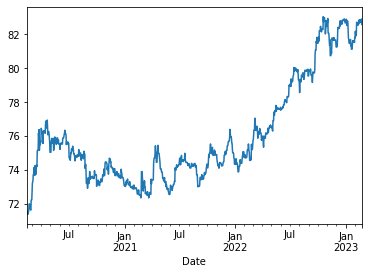

In [559]:
dff['Value of Rupee'].plot()

Non-Stationary
Stationary


<AxesSubplot:xlabel='Date'>

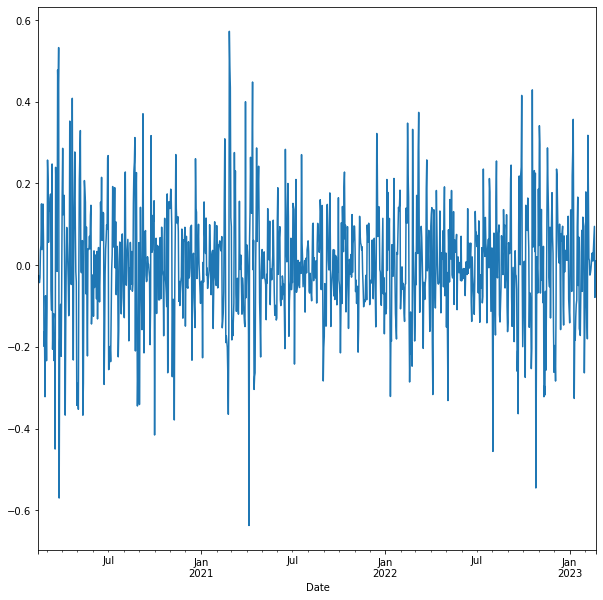

In [560]:
from statsmodels.tsa.seasonal import STL
print(adf_test(dff['Value of Rupee']))
stl = STL(dff['Value of Rupee'], period=7)
res = stl.fit()
dff['trend'] = res.trend
dff['seasonal'] = res.seasonal
dff['residual'] = res.resid
dff['reversed'] = dff['residual']+dff['trend']+dff['seasonal']
print(adf_test(dff['residual']))
dff['residual'].plot(figsize=(10,10))

In [561]:
dff.head()

,Outward Remittances,Foreign Investment Inflows,Foreign Trade - Trade Balance - Oil,Sales and Purchases of Dollar -Sale,Sales and Purchases of Dollar -Net,International Trade Services - Imports,International Trade Services - Exports,External Commercial borrowings - Total Number,External Commercial borrowings - Total Amount,External Commercial borrowings - Weighted Average Maturity,Value of Rupee,trend,seasonal,residual,reversed
Date,,,,,,,,,,,,,,,
2020-02-14,822.057953,2873,-3909.338048,-717.286214,9144,2183.962961,3448.222619,91,4175,8.66,71.45,71.216559,0.259145,-0.025704,71.45
2020-02-15,820.730165,2873,-3900.894823,-733.501969,9144,2177.611519,3435.571668,91,4175,8.66,71.45,71.299619,0.185469,-0.035088,71.45
2020-02-16,819.402376,2873,-3892.451599,-749.717725,9144,2171.260077,3422.920718,91,4175,8.66,71.45,71.380824,0.111898,-0.042723,71.45
2020-02-17,818.074588,2873,-3884.008375,-765.933480,9144,2164.908635,3410.269767,91,4175,8.66,71.38,71.459846,-0.049044,-0.030803,71.38
2020-02-18,816.746799,2873,-3875.565150,-782.149235,9144,2158.557192,3397.618816,91,4175,8.66,71.55,71.536528,-0.022522,0.035995,71.55


In [562]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = dff[columns[:-1]]
y = dff[['residual','trend','seasonal','Value of Rupee']]
#y = dff[['Value of Rupee']]
#y = dff[['residual','Value of Rupee']]
X[columns[:-1]] = scaler.fit_transform(X[columns[:-1]])
X_train = X.iloc[:884,:]
X_test = X.iloc[884:,:]
y_train = y.iloc[:884]
y_test = y.iloc[884:]

In [564]:
model = auto_arima(y_train['residual'], exogenous=X_train,seasonal=True,m=7)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  884
Model:             SARIMAX(2, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood                 913.526
Date:                                Sat, 01 Apr 2023   AIC                          -1809.051
Time:                                        17:01:00   BIC                          -1765.991
Sample:                                    02-14-2020   HQIC                         -1792.588
                                         - 07-16-2022                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.691e-06   5.76e-05      0.099      0.921      -0.000       0.000
ar.L1          1.1805      0.090     13.106      0.000       1.004       1.357
ar.L2         -0.3112      0.032     -9.708      0.000      -0.374      -0.248
ma.L1         -0.8609      0.089     -9.718      0.000      -1.035      -0.687
ar.S.L7       -0.5581      0.108     -5.157      0.000      -0.770      -0.346
ar.S.L14      -0.2381      0.030     -8.025      0.000      -0.296      -0.180
ma.S.L7       -0.4753      0.107     -4.426      0.000      -0.686      -0.265
ma.S.L14      -0.4074      0.108     -3.766      0.000      -0.619      -0.195
sigma2         0.0073      0.000     27.656      0.000       0.007       0.008
===================================================================================
Ljung-Box (L1) (Q):                   6.24   Jarque-Bera (JB):               414.81
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [565]:
model_fit = SARIMAX(y_train['residual'], exog=X_train,order=model.order, seasonal_order=model.seasonal_order).fit()
residual_predict = model_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1,exog=X_test)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               residual   No. Observations:                  884
Model:             SARIMAX(2, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood                 905.326
Date:                                Sat, 01 Apr 2023   AIC                          -1774.652
Time:                                        17:15:15   BIC                          -1688.532
Sample:                                    02-14-2020   HQIC                         -1741.725
                                         - 07-16-2022                                         
Covariance Type:                                  opg                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Outward Remittances                                           -0.0070      0.006     -1.205      0.228      -0.018       0.004
Foreign Investment Inflows                                    -0.0014      0.005     -0.266      0.790      -0.012       0.009
Foreign Trade - Trade Balance - Oil                           -0.0042      0.004     -0.993      0.321      -0.012       0.004
Sales and Purchases of Dollar -Sale                           -0.0027      0.003     -1.020      0.308      -0.008       0.002
Sales and Purchases of Dollar -Net                          5.307e-05      0.005      0.011      0.991      -0.010       0.010
International Trade Services - Imports                        -0.0084      0.006     -1.368      0.171      -0.020       0.004
International Trade Services - Exports                         0.0135      0.005      2.573      0.010       0.003       0.024
External Commercial borrowings - Total Number                  0.0100      0.006      1.655      0.098      -0.002       0.022
External Commercial borrowings - Total Amount                 -0.0038      0.005     -0.803      0.422      -0.013       0.005
External Commercial borrowings - Weighted Average Maturity     0.0057      0.005      1.158      0.247      -0.004       0.015
ar.L1                                                          1.2580      0.048     26.313      0.000       1.164       1.352
ar.L2                                                         -0.4194      0.028    -14.965      0.000      -0.474      -0.364
ma.L1                                                         -0.8669      0.045    -19.139      0.000      -0.956      -0.778
ar.S.L7                                                       -0.4239      0.136     -3.121      0.002      -0.690      -0.158
ar.S.L14                                                      -0.1839      0.036     -5.159      0.000      -0.254      -0.114
ma.S.L7                                                       -0.4834      0.135     -3.582      0.000      -0.748      -0.219
ma.S.L14                                                      -0.3214      0.132     -2.442      0.015      -0.579      -0.063
sigma2                                                         0.0074      0.000     25.036      0.000       0.007       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               344.44
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.05
==========

In [567]:
model2 = auto_arima(y_train['trend'], exogenous=X_train,seasonal=True,m=7)
model_fit2 = SARIMAX(y_train['trend'], exog=X_train,order=model2.order, seasonal_order=model2.seasonal_order).fit()
trend_predict = model_fit2.predict(start=len(X_train), end=len(X_train)+len(X_test)-1,exog=X_test)
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               trend   No. Observations:                  884
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 7)   Log Likelihood                3335.755
Date:                             Sat, 01 Apr 2023   AIC                          -6635.510
Time:                                     17:31:21   BIC                          -6549.410
Sample:                                 02-14-2020   HQIC                         -6602.589
                                      - 07-16-2022                                         
Covariance Type:                               opg                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Outward Remittances                                            0.0090      0.002      5.633      0.000       0.006       0.012
Foreign Investment Inflows                                     0.0010      0.002      0.519      0.603      -0.003       0.005
Foreign Trade - Trade Balance - Oil                           -0.0030      0.002     -1.958      0.050      -0.006    2.23e-06
Sales and Purchases of Dollar -Sale                           -0.0059      0.003     -2.048      0.041      -0.011      -0.000
Sales and Purchases of Dollar -Net                            -0.0061      0.003     -1.909      0.056      -0.012       0.000
International Trade Services - Imports                        -0.0016      0.004     -0.364      0.716      -0.010       0.007
International Trade Services - Exports                      7.819e-05      0.004      0.020      0.984      -0.007       0.008
External Commercial borrowings - Total Number                 -0.0007      0.002     -0.348      0.728      -0.005       0.003
External Commercial borrowings - Total Amount                 -0.0028      0.002     -1.407      0.159      -0.007       0.001
External Commercial borrowings - Weighted Average Maturity    -0.0002      0.002     -0.090      0.928      -0.004       0.004
ar.L1                                                          1.9971      0.073     27.171      0.000       1.853       2.141
ar.L2                                                         -1.3610      0.137     -9.904      0.000      -1.630      -1.092
ar.L3                                                          0.3061      0.071      4.321      0.000       0.167       0.445
ma.L1                                                          0.0406      0.066      0.614      0.539      -0.089       0.170
ma.L2                                                          0.4389      0.029     15.043      0.000       0.382       0.496
ar.S.L7                                                       -0.4682      0.134     -3.492      0.000      -0.731      -0.205
ma.S.L7                                                        0.2389      0.154      1.553      0.120      -0.063       0.540
sigma2                                                      3.157e-05   1.19e-06     26.441      0.000    2.92e-05    3.39e-05
===================================================================================
Ljung-Box (L1) (Q):                 104.27   Jarque-Bera (JB):               268.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.66
=====================================

In [568]:
model3 = auto_arima(y_train['seasonal'], exogenous=X_train,seasonal=True,m=7)
model_fit3 = SARIMAX(y_train['seasonal'], exog=X_train,order=model3.order, seasonal_order=model3.seasonal_order).fit()
seasonal_predict = model_fit3.predict(start=len(X_train), end=len(X_train)+len(X_test)-1,exog=X_test)
model_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               seasonal   No. Observations:                  884
Model:             SARIMAX(0, 0, 4)x(2, 0, [1, 2], 7)   Log Likelihood                2051.130
Date:                                Sat, 01 Apr 2023   AIC                          -4064.260
Time:                                        17:38:49   BIC                          -3973.355
Sample:                                    02-14-2020   HQIC                         -4029.503
                                         - 07-16-2022                                         
Covariance Type:                                  opg                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Outward Remittances                                           -0.0035      0.005     -0.750      0.453      -0.013       0.006
Foreign Investment Inflows                                    -0.0004      0.004     -0.091      0.928      -0.009       0.008
Foreign Trade - Trade Balance - Oil                           -0.0036      0.003     -1.168      0.243      -0.010       0.002
Sales and Purchases of Dollar -Sale                            0.0018      0.004      0.474      0.636      -0.006       0.009
Sales and Purchases of Dollar -Net                             0.0052      0.004      1.408      0.159      -0.002       0.012
International Trade Services - Imports                         0.0008      0.006      0.143      0.886      -0.010       0.012
International Trade Services - Exports                         0.0015      0.005      0.274      0.784      -0.009       0.012
External Commercial borrowings - Total Number                 -0.0002      0.004     -0.043      0.966      -0.007       0.007
External Commercial borrowings - Total Amount                 -0.0003      0.004     -0.082      0.935      -0.009       0.008
External Commercial borrowings - Weighted Average Maturity    -0.0026      0.004     -0.614      0.539      -0.011       0.006
ma.L1                                                          0.0873      0.030      2.957      0.003       0.029       0.145
ma.L2                                                         -0.4036      0.031    -12.933      0.000      -0.465      -0.342
ma.L3                                                         -0.4407      0.036    -12.408      0.000      -0.510      -0.371
ma.L4                                                         -0.0831      0.030     -2.804      0.005      -0.141      -0.025
ar.S.L7                                                        1.2296      0.042     29.278      0.000       1.147       1.312
ar.S.L14                                                      -0.5741      0.039    -14.909      0.000      -0.650      -0.499
ma.S.L7                                                        0.4594      0.045     10.302      0.000       0.372       0.547
ma.S.L14                                                       0.2638      0.040      6.613      0.000       0.186       0.342
sigma2                                                         0.0005   2.32e-05     23.714      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   4.26   Jarque-Bera (JB):               109.42
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew: 

<AxesSubplot:xlabel='Date'>

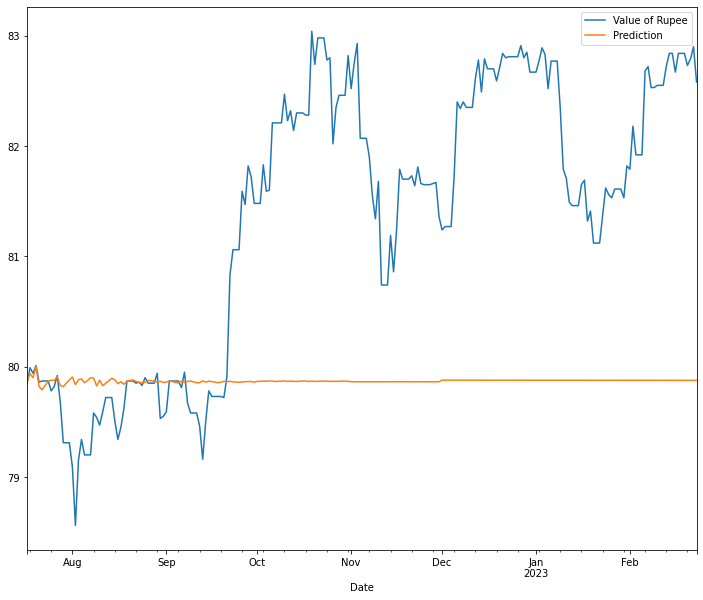

In [570]:
y_test['residuals_prediction'] = list(residual_predict)
y_test['trend_prediction'] = list(trend_predict)
y_test['seasonal_predict'] = list(seasonal_predict)
y_test['Prediction'] = y_test['residuals_prediction']+y_test['trend_prediction']+y_test['seasonal_predict']
y_test[['Value of Rupee','Prediction']].plot(figsize = (12,10))

In [577]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
mape = np.mean(np.abs((y_test['Value of Rupee'] - y_test['Prediction']) /y_test['Value of Rupee']))*100
mse = mean_squared_error(y_test['Value of Rupee'], y_test['Prediction'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test['Value of Rupee'], y_test['Prediction'])

results = pd.DataFrame()

columns = ['MAPE','MSE','RMSE','MAE']
val = [mape,mse,rmse,mae]

results['Metrics'] = columns
results['Values'] = val

results

,Metrics,Values
0,MAPE,1.981048
1,MSE,3.770548
2,RMSE,1.941790
3,MAE,1.627170


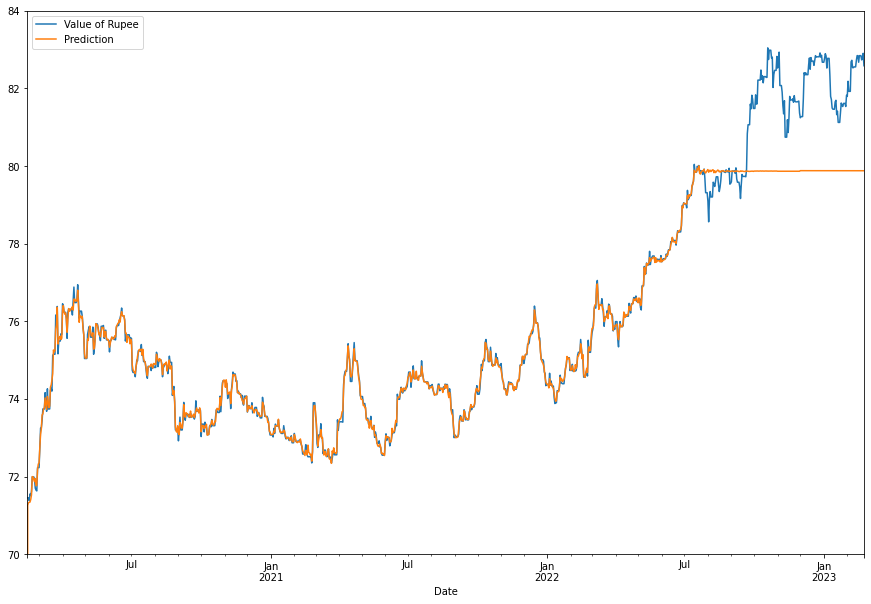

In [580]:
x = dff[['Value of Rupee']]
trend_predict2 = model_fit2.predict(start=0, end=len(X_train)+len(X_test)-1,exog=X_test)
residual_predict2 = model_fit.predict(start=0, end=len(X_train)+len(X_test)-1,exog=X_test)
seasonal_predict2 = model_fit3.predict(start=0, end=len(X_train)+len(X_test)-1,exog=X_test)
x['residuals_prediction'] = list(residual_predict2)
x['trend_prediction'] = list(trend_predict2)
x['seasonal_predict'] = list(seasonal_predict2)
x['Prediction'] = x['residuals_prediction']+x['trend_prediction']+x['seasonal_predict']
ax = x[['Value of Rupee','Prediction']].plot(figsize = (15,10))
ax.set_ylim([70, 84])
plt.show()